In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d patrickfleith/nasa-battery-dataset

Dataset URL: https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset
License(s): copyright-authors
nasa-battery-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nasa-battery-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
metadata_df = pd.read_csv('/content/cleaned_dataset/metadata.csv')
metadata_df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [ ]:
discharge_metadata = metadata_df[(metadata_df["battery_id"]=="B0005") & (metadata_df["type"]=="discharge")]
discharge_metadata_1 = metadata_df[(metadata_df["battery_id"]=="B0006") & (metadata_df["type"]=="discharge")]
discharge_metadata_2 = metadata_df[(metadata_df["battery_id"]=="B0007") & (metadata_df["type"]=="discharge")]
discharge_metadata_3 = metadata_df[(metadata_df["battery_id"]=="B0018") & (metadata_df["type"]=="discharge")]

In [ ]:
discharge_files = discharge_metadata["filename"].tolist()
discharge_files_1 = discharge_metadata_1["filename"].tolist()
discharge_files_2 = discharge_metadata_2["filename"].tolist()
discharge_files_3 = discharge_metadata_3["filename"].tolist()
discharge_files

['05122.csv',
 '05124.csv',
 '05126.csv',
 '05128.csv',
 '05130.csv',
 '05132.csv',
 '05134.csv',
 '05136.csv',
 '05138.csv',
 '05140.csv',
 '05142.csv',
 '05145.csv',
 '05147.csv',
 '05149.csv',
 '05151.csv',
 '05153.csv',
 '05155.csv',
 '05157.csv',
 '05159.csv',
 '05162.csv',
 '05166.csv',
 '05170.csv',
 '05174.csv',
 '05178.csv',
 '05182.csv',
 '05186.csv',
 '05190.csv',
 '05194.csv',
 '05198.csv',
 '05202.csv',
 '05206.csv',
 '05210.csv',
 '05214.csv',
 '05218.csv',
 '05222.csv',
 '05226.csv',
 '05230.csv',
 '05234.csv',
 '05238.csv',
 '05242.csv',
 '05246.csv',
 '05250.csv',
 '05254.csv',
 '05256.csv',
 '05260.csv',
 '05264.csv',
 '05268.csv',
 '05270.csv',
 '05274.csv',
 '05278.csv',
 '05282.csv',
 '05286.csv',
 '05290.csv',
 '05294.csv',
 '05298.csv',
 '05302.csv',
 '05306.csv',
 '05310.csv',
 '05314.csv',
 '05318.csv',
 '05322.csv',
 '05326.csv',
 '05330.csv',
 '05334.csv',
 '05336.csv',
 '05340.csv',
 '05344.csv',
 '05348.csv',
 '05352.csv',
 '05356.csv',
 '05360.csv',
 '0536

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the separator function
def separator(file):
    df = pd.read_csv(f'/content/cleaned_dataset/data/{file}')
    df = df.drop(columns=['Current_load', 'Voltage_load', 'Time'])
    n_rows = len(df)
    patch_size = n_rows // 35

    averaged_df = pd.DataFrame()

    for i in range(35):
        start_index = i * patch_size
        if i == 34:  # Last patch includes all remaining rows
            end_index = n_rows
        else:
            end_index = start_index + patch_size

        patch = df.iloc[start_index:end_index]
        averaged_patch = patch.mean(axis=0)

        averaged_df[i] = averaged_patch

    averaged_df = averaged_df.transpose()

    return averaged_df



In [ ]:
separator ('05122.csv')

,Voltage_measured,Current_measured,Temperature_measured
0,4.048636,-1.208806,24.464250
1,3.898287,-2.014032,25.309149
2,3.857002,-2.013503,26.253465
3,3.826607,-2.013141,27.127849
4,3.801080,-2.012353,27.927449
5,3.777241,-2.012195,28.663334
6,3.754150,-2.012924,29.289837
7,3.732615,-2.013061,29.758358
8,3.712614,-2.011896,30.086902
9,3.692974,-2.011859,30.332411


In [ ]:
len(discharge_files[:-2])

166

In [ ]:
input_data.dtype

dtype('float64')

In [ ]:
output_data.dtype

dtype('<U18')

In [ ]:
# List of discharge file names
discharge_files = discharge_metadata["filename"][:-2].tolist()

capacity_data_list = discharge_metadata["Capacity"][:-2].tolist()

# Initialize an empty list to store the input data
input_data = []

# Process each discharge file and combine the results
for file in discharge_files:
    averaged_df = separator(file)
    input_data.append(averaged_df.values)

# Convert input_data to a numpy array for model training
input_data = np.array(input_data).astype(np.float32)  # Ensure input_data is of type float32

# Convert output data to a numpy array for model training
output_data = np.array(capacity_data_list).astype(np.float32)  # Ensure output_data is of type float32

# Check the shape of the input data and output data
print(input_data.shape)  # Should be (num_files, 35, 3)
print(output_data.shape)  # Should be (num_files,)

(166, 35, 3)
(166,)


In [ ]:
# List of discharge file names
discharge_files_3 = discharge_metadata_3["filename"][:-2].tolist()   # Replace with your actual file names

capacity_data_list_3 = discharge_metadata_3["Capacity"][:-2].tolist()

# Initialize an empty list to store the input data
input_data_3 = []

# Process each discharge file and combine the results
for file in discharge_files_3:
    averaged_df = separator(file)
    input_data_3.append(averaged_df.values)

# Convert input_data to a numpy array for model training
input_data_3 = np.array(input_data_3).astype(np.float32)  # Ensure input_data is of type float32

# Convert output data to a numpy array for model training
output_data_3 = np.array(capacity_data_list_3).astype(np.float32)  # Ensure output_data is of type float32

# Check the shape of the input data and output data
print(input_data_3.shape)  # Should be (num_files, 35, 3)
print(output_data_3.shape)  # Should be (num_files,)

(130, 35, 3)
(130,)


In [ ]:
split = int(len(input_data) * 0.3)
X_train_3, X_test_3 = input_data_3[:split], input_data_3[split:]
y_train_3, y_test_3 = output_data_3[:split], output_data_3[split:]

In [ ]:


from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=1, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (165, 35, 3)
y_train shape: (165,)
X_test shape: (1, 35, 3)
y_test shape: (1,)


In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(35, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:

# Fit the model
model.fit(X_test_3, y_test_3, epochs=200, verbose=1)

Epoch 1/200
3/3 [==============================] - 0s 46ms/step - loss: 0.0090
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0057
Epoch 3/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0053
Epoch 4/200
3/3 [==============================] - 0s 56ms/step - loss: 0.0066
Epoch 5/200
3/3 [==============================] - 0s 66ms/step - loss: 0.0064
Epoch 6/200
3/3 [==============================] - 0s 50ms/step - loss: 0.0054
Epoch 7/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0050
Epoch 8/200
3/3 [==============================] - 0s 34ms/step - loss: 0.0056
Epoch 9/200
3/3 [==============================] - 0s 47ms/step - loss: 0.0056
Epoch 10/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0052
Epoch 11/200
3/3 [==============================] - 0s 59ms/step - loss: 0.0051
Epoch 12/200
3/3 [==============================] - 0s 45ms/step - loss: 0.0052
Epoch 13/200
3/3 [==============================]

6/6 [==============================] - 0s 8ms/step


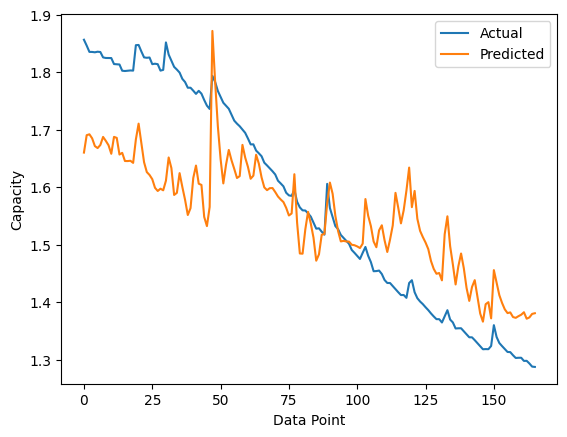

Mean absolute percentage error: 11.60%
Mean absolute error: 0.10
Root mean squared error: 0.12


In [ ]:

# Predict the model for X_test
predicted_capacities = model.predict(input_data)

# Plot the actual and predicted graph
import matplotlib.pyplot as plt

plt.plot(output_data, label="Actual")
plt.plot(predicted_capacities, label="Predicted")
plt.xlabel("Data Point")
plt.ylabel("Capacity")
plt.legend()
plt.show()

# Calculate mean absolute percentage error
mape = np.mean(np.abs((output_data - predicted_capacities) / output_data)) * 100
print(f"Mean absolute percentage error: {mape:.2f}%")

# Calculate mean absolute error
mae = mean_absolute_error(output_data, predicted_capacities)
print(f"Mean absolute error: {mae:.2f}")

# Calculate root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(output_data, predicted_capacities))
print(f"Root mean squared error: {rmse:.2f}")


5/5 [==============================] - 0s 18ms/step


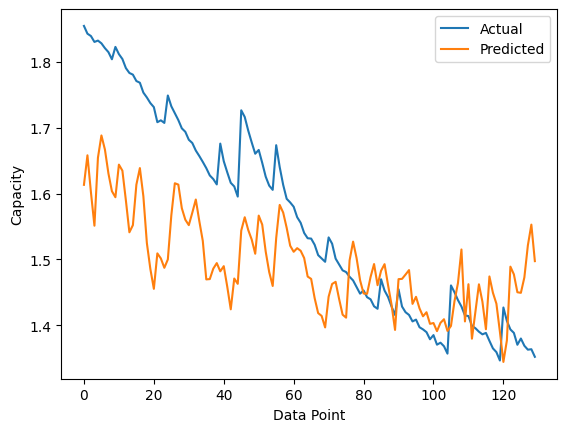

Mean absolute percentage error: 9.13%
Mean absolute error: 0.10
Root mean squared error: 0.12


In [ ]:
# predected On Battery B0007, trained on B0005

# Predict the model for X_test
predicted_capacities_3 = model.predict(input_data_3)

# Plot the actual and predicted graph
import matplotlib.pyplot as plt

plt.plot(output_data_3, label="Actual")
plt.plot(predicted_capacities_3, label="Predicted")
plt.xlabel("Data Point")
plt.ylabel("Capacity")
plt.legend()
plt.show()

# Calculate mean absolute percentage error
mape = np.mean(np.abs((output_data_3 - predicted_capacities_3) / output_data_3)) * 100
print(f"Mean absolute percentage error: {mape:.2f}%")

# Calculate mean absolute error
mae = mean_absolute_error(output_data_3, predicted_capacities_3)
print(f"Mean absolute error: {mae:.2f}")

# Calculate root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(output_data_3, predicted_capacities_3))
print(f"Root mean squared error: {rmse:.2f}")


In [ ]:


predicted_capacities_list = predicted_capacities.tolist()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def linear_regression_fit(data):
    # Ensure the data is in the form of a numpy array
    data = np.array(data)

    # Generate X values (indices of the data points)
    X = np.arange(len(data)).reshape(-1, 1)

    # Reshape the data to match the expected format for scikit-learn
    y = data.reshape(-1, 1)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Retrieve the coefficients of the best-fit line
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    x_intercept = -intercept / slope

    # Predict y values for the best-fit line
    y_pred = model.predict(X)

    # Plot the original data and the best-fit line
    #plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(output_data_3)
    plt.plot(predicted_capacities_3, label = 'Predicted')
    plt.plot(X, y_pred, color='red', label='Best-fit line')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()

    return slope, intercept, x_intercept

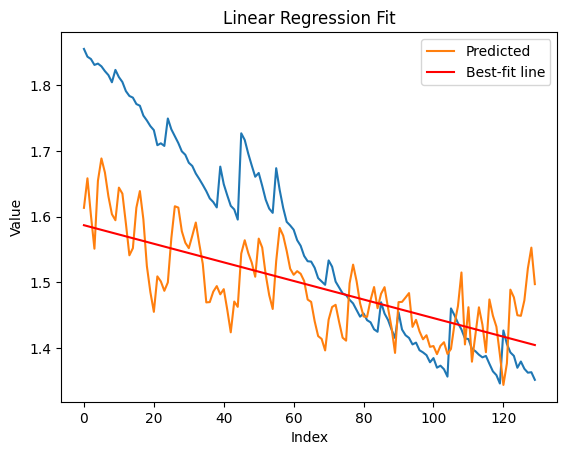

Slope: -0.0014124811604828823, Intercept: 1.5869539271364197, Drive Cycle: 1123.522190266871


In [ ]:
slope, intercept, x_intercept = linear_regression_fit(predicted_capacities_3)
print(f"Slope: {slope}, Intercept: {intercept}, Drive Cycle: {x_intercept}")

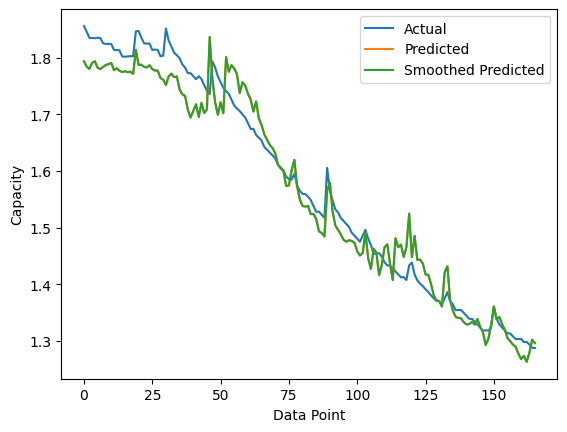

Mean absolute percentage error after smoothing: 1.94%
Mean absolute error after smoothing: 0.03
Root mean squared error after smoothing: 0.04


In [ ]:
from scipy.signal import savgol_filter

# Smooth the predicted curve using the Savitzky-Golay filter
# Use mode='nearest' to handle the edge cases without requiring a smaller window length
smoothed_predicted_capacities = savgol_filter(predicted_capacities, window_length=11, polyorder=3, mode='nearest')

# Plot the actual, predicted, and smoothed predicted curves
plt.plot(output_data, label="Actual")
plt.plot(predicted_capacities, label="Predicted")
plt.plot(smoothed_predicted_capacities, label="Smoothed Predicted")
plt.xlabel("Data Point")
plt.ylabel("Capacity")
plt.legend()
plt.show()

# Calculate the mean absolute percentage error after smoothing
mape_smoothed = np.mean(np.abs((output_data - smoothed_predicted_capacities.reshape(-1)) / output_data)) * 100
print(f"Mean absolute percentage error after smoothing: {mape_smoothed:.2f}%")

# Calculate the mean absolute error after smoothing
mae_smoothed = mean_absolute_error(output_data, smoothed_predicted_capacities)
print(f"Mean absolute error after smoothing: {mae_smoothed:.2f}")

# Calculate the root mean squared error after smoothing
rmse_smoothed = np.sqrt(mean_squared_error(output_data, smoothed_predicted_capacities))
print(f"Root mean squared error after smoothing: {rmse_smoothed:.2f}")

In [ ]:
accuracy = 100 - mape_smoothed
accuracy

98.06351512670517

In [ ]:
# Function to predict the capacity for a new discharge file
def predict_capacity(file, model):
    averaged_df = separator(file)
    input_data = averaged_df.values.reshape(1, 35, 3)  # Reshape for a single sample
    predicted_capacity = model.predict(input_data)
    return predicted_capacity

# Predict the capacity for a new discharge file
new_file = '05734.csv'  # Replace with your actual new file name
predicted_capacity = predict_capacity(new_file, model)
print(f'Predicted Capacity for {new_file}: {predicted_capacity}')


1/1 [==============================] - 0s 65ms/step
Predicted Capacity for 05734.csv: [[1.4182432]]
